**Prediksi Pelanggan Potensial Untuk Campaign Sepeda**

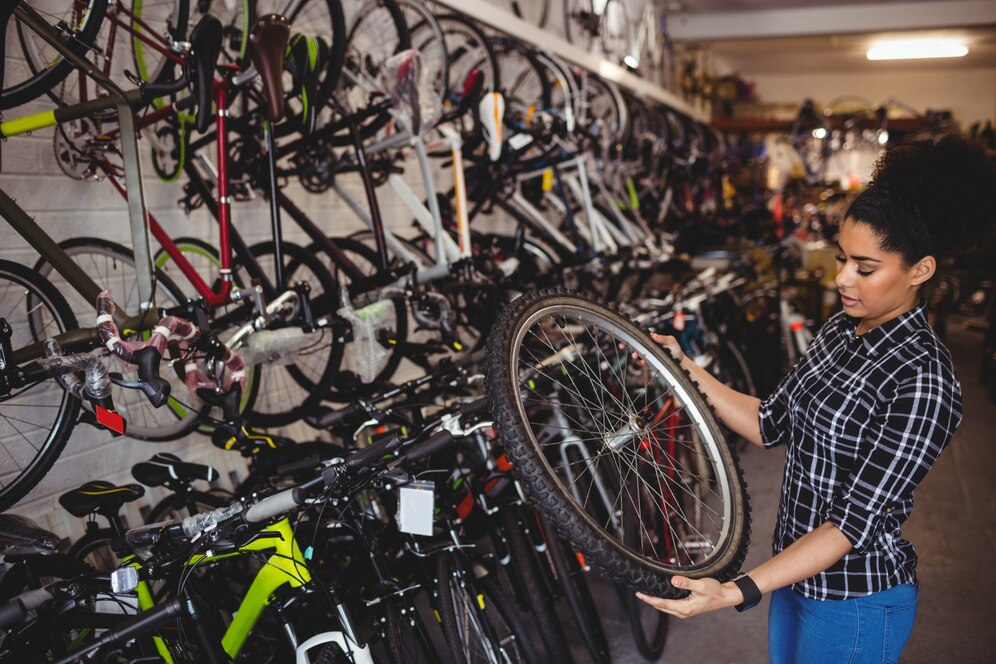

# **Background**

1. Peran yang Akan Dijalankan:
Sebagai seorang data scientist, tim menggunakan model machine learning untuk membantu tim penjualan dalam memprediksi pelanggan potensial yang akan membeli sepeda. Tugas ini mencakup melakukan analisis data dan mengidentifikasi faktor-faktor yang mempengaruhi keputusan pembelian sepeda oleh pelanggan.

2. Problem Statement:
Banyak usaha penjualan sepeda menghadapi tantangan dalam mengidentifikasi pelanggan potensial yang memiliki kecenderungan untuk membeli. Pertanyaan yang ingin dijawab adalah: bagaimana kita dapat meningkatkan prediksi pelanggan potensial untuk penjualan sepeda dengan memahami faktor-faktor yang mempengaruhi keputusan pembelian?

3. Goals:
Meningkatkan efektivitas penjualan sepeda dengan mengidentifikasi pelanggan potensial secara lebih akurat.

4. Objective:

 * Membangun model prediktif untuk memprediksi pelanggan potensial yang akan membeli sepeda berdasarkan berbagai fitur seperti demografi pelanggan, riwayat pembelian, interaksi dengan kampanye pemasaran, dan lain-lain.
 * Mengidentifikasi dan memahami perilaku pelanggan yang paling berpengaruh terhadap keputusan pembelian sepeda, serta memberikan rekomendasi berbasis data untuk meningkatkan efektivitas strategi pemasaran.

5. Evaluation Metrics:<br>

* Recall: Mengukur seberapa baik model dalam mengidentifikasi pelanggan potensial yang sebenarnya akan membeli sepeda. Recall dipilih karena project ini berfokus untuk mengkonversi pelanggan sebanyak banyaknya. Dan meminimalisir FN (pelanggan yang sebenarnya mau membeli sepeda, tapi di prediksi sebagai orang yang tidak mau membeli sepeda).

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

# Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Penjualan-Sepeda/main/penjualan_sepeda.csv')
df.head()

ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
3  24381         Single     NaN  70000.0       0.0        Bachelors   
4  25597         Single    Male  30000.0       0.0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


* Data terdiri dari 13 fitur, diantaranya adalah ID, Marital Status, Gender, Income, Children, Education, Occupation, Home, Owner, Cars, Commute Distance, Region, Age dan Purchased Bike.
* Data terdiri dari 1000 baris
* Namun terdapat missing value di beberapa fitur



# EDA

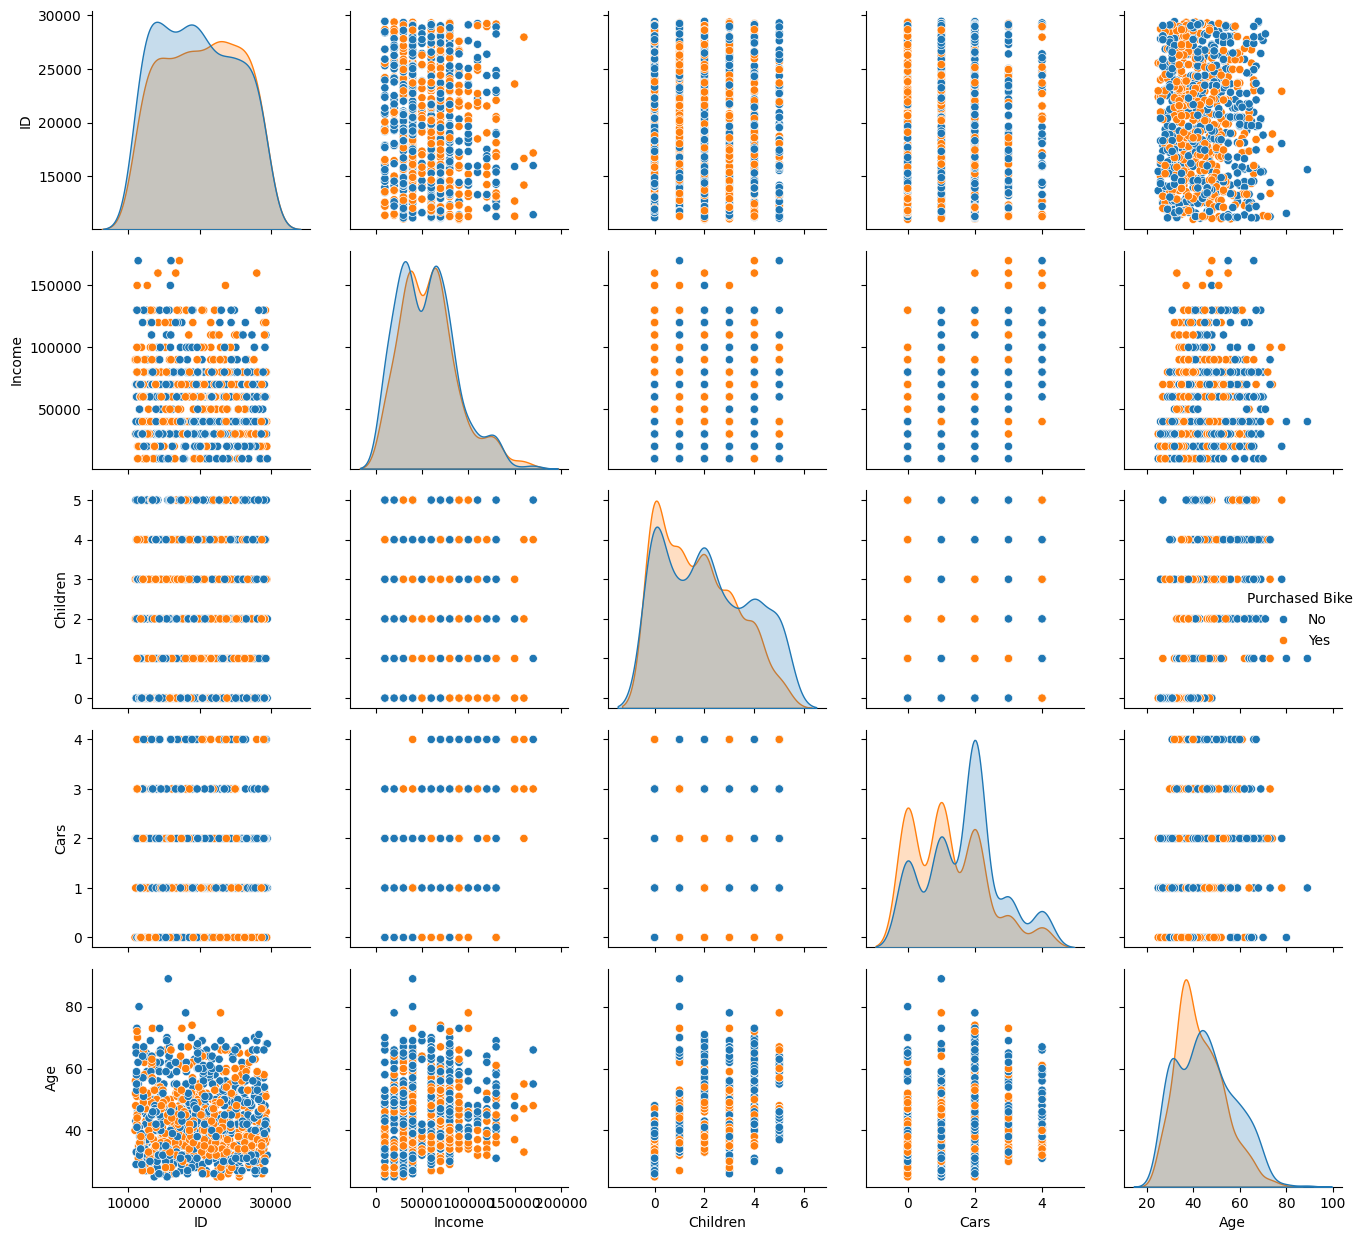

In [ ]:
sb.pairplot(data=df, hue='Purchased Bike', diag_kind='kde')
plt.tight_layout()

Dari pairplot, belum terlihat pola yang jelas untuk membedakan pelanggan potensial dalam pembelian sepeda atau tidak.

In [ ]:
cat = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Children', 'Cars']
num = ['Income', 'Age']

In [ ]:
df_num = df[num]

In [ ]:
df_num

Income   Age
0     40000.0  42.0
1     30000.0  43.0
2     80000.0  60.0
3     70000.0  41.0
4     30000.0  36.0
..        ...   ...
995   60000.0  54.0
996   70000.0  35.0
997   60000.0  38.0
998  100000.0  38.0
999   60000.0  53.0

[1000 rows x 2 columns]

In [ ]:
for col in num:
    print(col)

Income
Age


## Explore fitur numerik

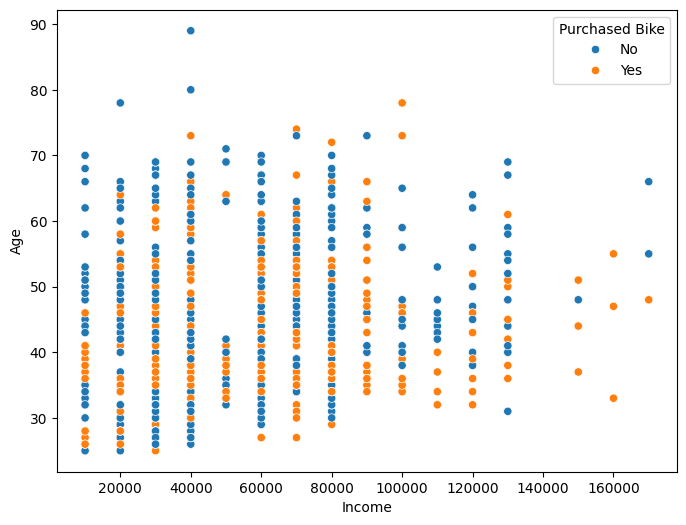

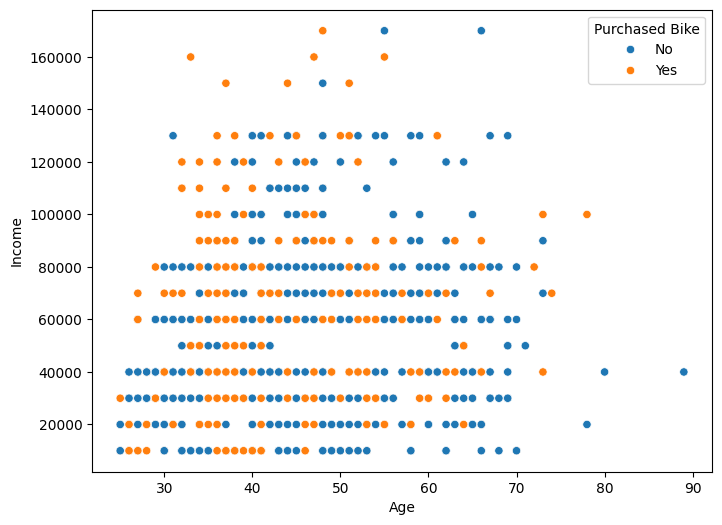

In [ ]:
for col in num:
  for col2 in num:
    if col != col2:
      plt.figure(figsize=(8,6))
      sb.scatterplot(data=df, x=col, y=col2, hue='Purchased Bike')
      plt.show

Income tinggi dengan usia antara 30 hingga kurang dari 60 cenderung mau membeli sepeda

## Explore fitur kategorik

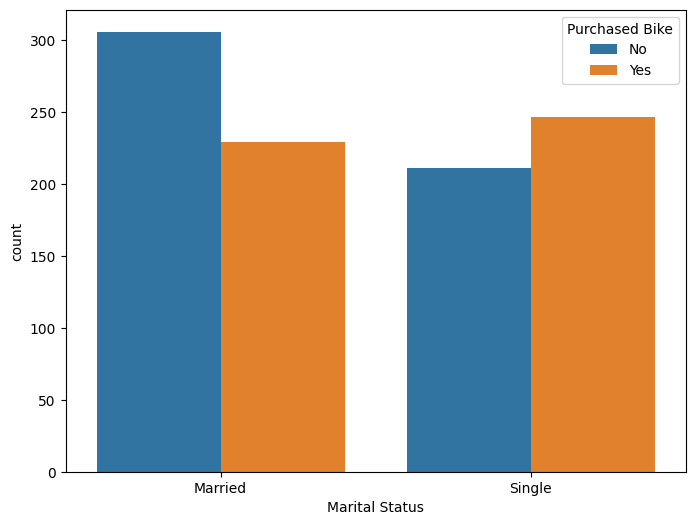

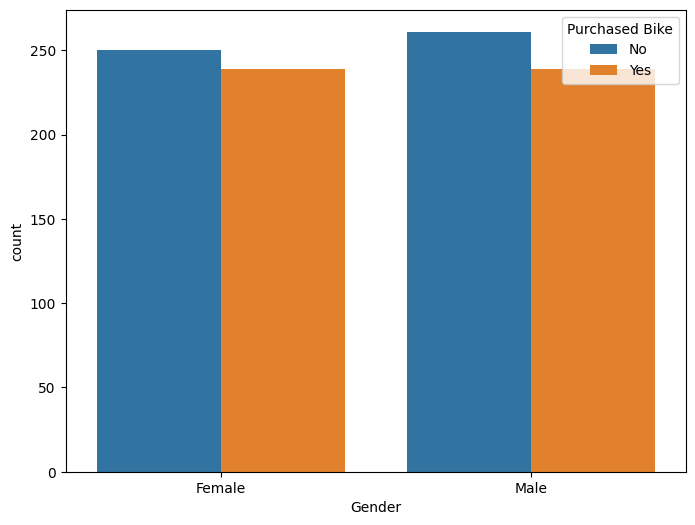

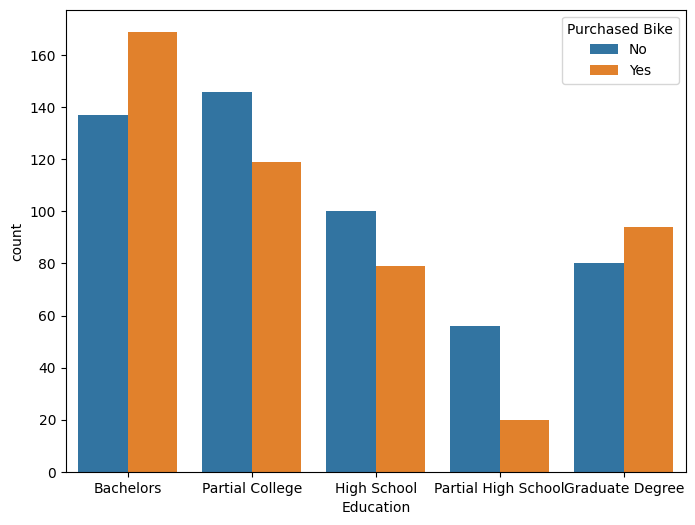

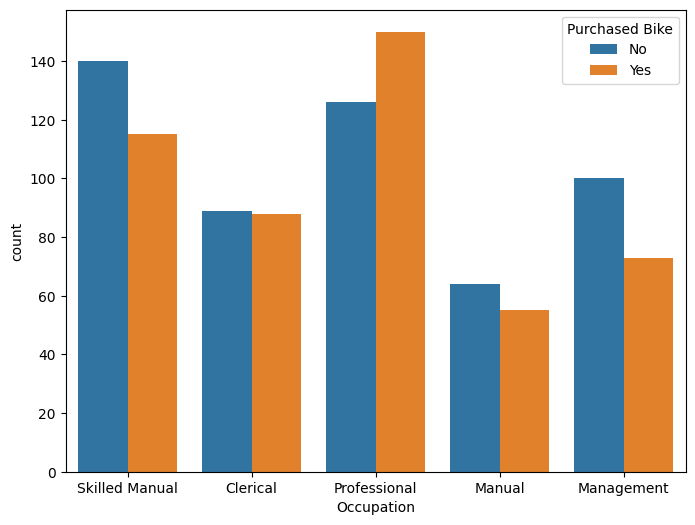

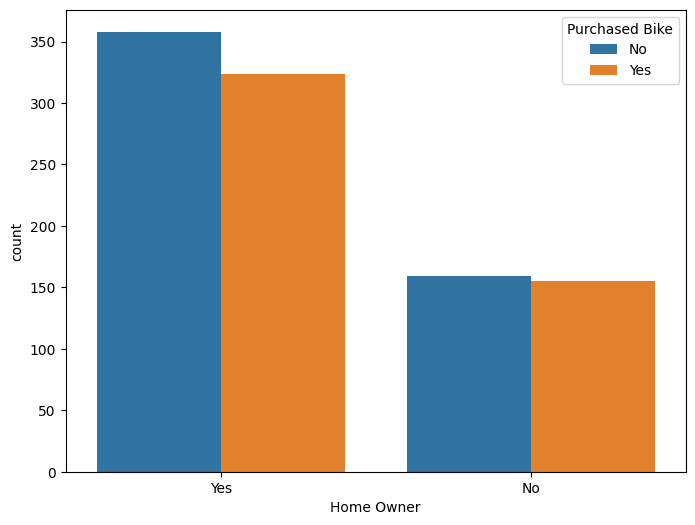

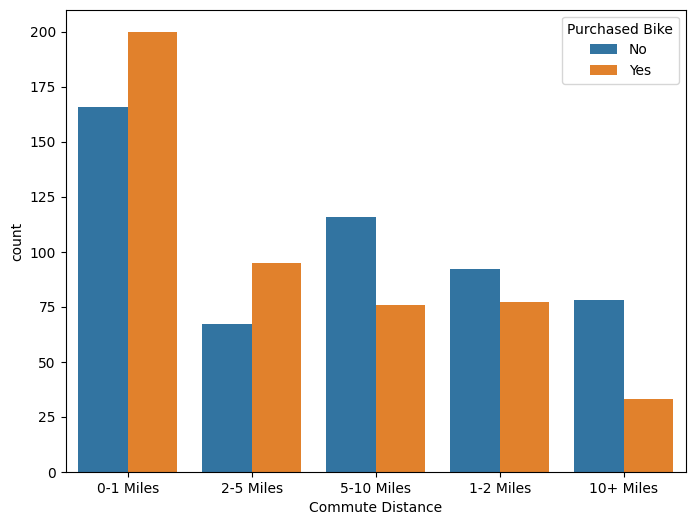

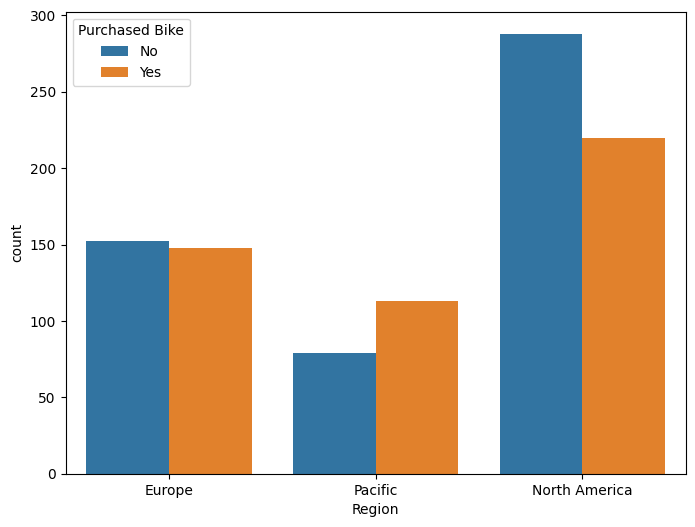

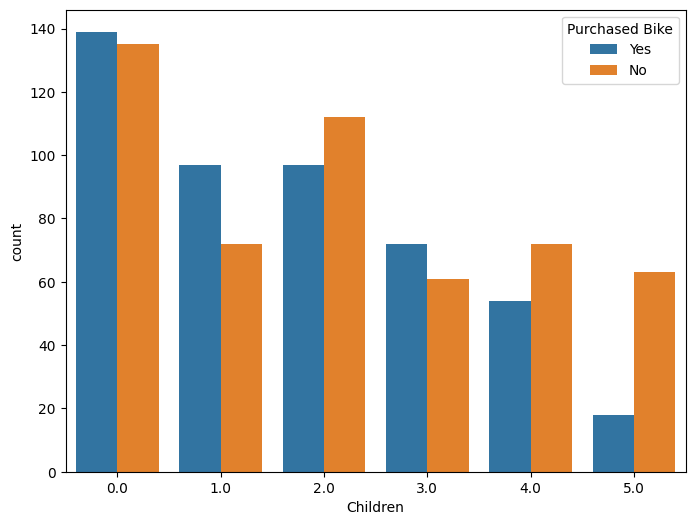

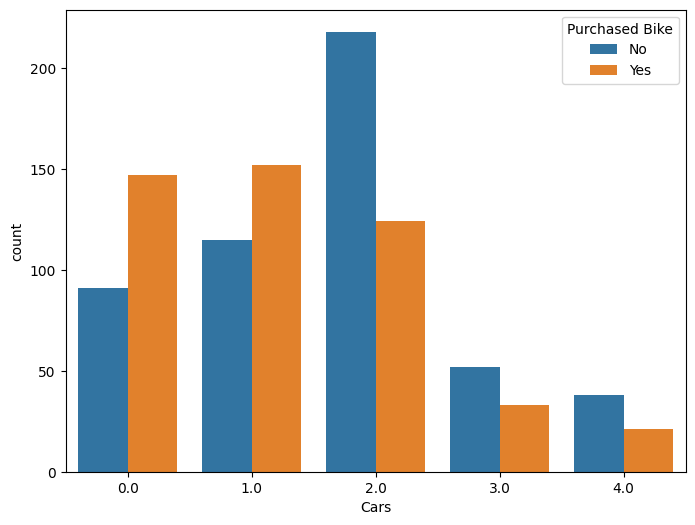

In [ ]:
for col in cat:
      plt.figure(figsize=(8,6))
      sb.countplot(data=df, x=col, hue='Purchased Bike')
      plt.show

1. Orang yang sudah menikah lebih cenderung tidak membeli sepeda. Sebaliknya, yang single cenderung membeli sepeda.
2. Hampir merata antara lelaki dan perempuan dari jumlah yang membeli sepeda, Namun ada sedikit perbedaan, dimana laki laki lebih banyak tidak membeli sepeda.
3. Orang dengan sedang kuliah sarjana, perguruan tinggi parsial (d3 atau lainnya), atau sudah lulus S1, cenderung membeli sepeda. Dan yang paling minim membeli sepeda adalah kelompok orang yang sedang SMA.
4. Jenis kemampuan atau ketrampilan yang membeli sepeda, paling banyak dari kelompok orang yang Pekerjaan profesional dan memiliki kemampuan manual.
5. Dari presentase yang ditawarkan dan yang tidak. Yang tidak memiliki rumah cenderung membeli sepeda, namun dari segi jumlah atau paling banyak membeli sepeda, yang punya rumah yang paling banyak membeli sepeda.
6. Jarak perjalanan 0-1 miles yang paling banyak membeli sepeda (orang yang jaraknya lebih dekat, cenderung akan membeli atau menggunakan sepeda)
7. Tingkat konversi paling bagus, dari seluruh yang ditawarkan sepeda, negara eropa yang paling baik dalam mengonversi pelanggan. Namun north america yang paling banyak membeli sepeda.
8. Semakin sedikit anaknya, atau yang tidak memiliki anak, cenderung akan membeli sepeda
9. Yang tidak punya dan punya mobil 1 cenderung membeli sepeda. Namun jika sudah punya mobil 2, mereka cenderung tidak membeli sepeda. Apalagi yang punya mobil 3 dan 4, mereka akan lebih tidak membeli sepeda, meskipun masih ada meski sangat sedikit.

In [ ]:
df['Cars'].unique()

array([ 0.,  1.,  2.,  4., nan,  3.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


# Data Preprocessing

In [ ]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
11/1000

0.011

Missing value yang paling besar hanya berbobot 1.1% (cukup kecil). Karena jumlah missing value yang sangat sedikit di data, maka dilakukan penghapusan baris jika mengandung missing value

In [ ]:
dt = df.dropna()
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    float64
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.1+ KB


In [ ]:
categorical_features = dt[['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']]
numeric_features = dt[['Income', 'Children', 'Cars', 'Age']]

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(categorical_features)

# Mengonversi hasil encoding menjadi dataframe
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
label_encoder = LabelEncoder()

dt['Purchased Bike'] = label_encoder.fit_transform(dt['Purchased Bike'])

<ipython-input-147-4a9bf061f9f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Purchased Bike'] = label_encoder.fit_transform(dt['Purchased Bike'])


In [ ]:
final_df = pd.concat([numeric_features, encoded_df, dt[['Purchased Bike']]], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 951
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         952 non-null    float64
 1   Children                       952 non-null    float64
 2   Cars                           952 non-null    float64
 3   Age                            952 non-null    float64
 4   Marital Status_Married         952 non-null    float64
 5   Marital Status_Single          952 non-null    float64
 6   Gender_Female                  952 non-null    float64
 7   Gender_Male                    952 non-null    float64
 8   Education_Bachelors            952 non-null    float64
 9   Education_Graduate Degree      952 non-null    float64
 10  Education_High School          952 non-null    float64
 11  Education_Partial College      952 non-null    float64
 12  Education_Partial High School  952 non-null    float64


In [ ]:
final_df.isna().sum()

Income                           44
Children                         44
Cars                             44
Age                              44
Marital Status_Married           44
Marital Status_Single            44
Gender_Female                    44
Gender_Male                      44
Education_Bachelors              44
Education_Graduate Degree        44
Education_High School            44
Education_Partial College        44
Education_Partial High School    44
Occupation_Clerical              44
Occupation_Management            44
Occupation_Manual                44
Occupation_Professional          44
Occupation_Skilled Manual        44
Home Owner_No                    44
Home Owner_Yes                   44
Commute Distance_0-1 Miles       44
Commute Distance_1-2 Miles       44
Commute Distance_10+ Miles       44
Commute Distance_2-5 Miles       44
Commute Distance_5-10 Miles      44
Region_Europe                    44
Region_North America             44
Region_Pacific              

In [ ]:
fin = final_df[final_df.isna()]
fin

Income  Children  Cars  Age  Marital Status_Married  \
0       NaN       NaN   NaN  NaN                     NaN   
1       NaN       NaN   NaN  NaN                     NaN   
2       NaN       NaN   NaN  NaN                     NaN   
4       NaN       NaN   NaN  NaN                     NaN   
5       NaN       NaN   NaN  NaN                     NaN   
..      ...       ...   ...  ...                     ...   
867     NaN       NaN   NaN  NaN                     NaN   
908     NaN       NaN   NaN  NaN                     NaN   
933     NaN       NaN   NaN  NaN                     NaN   
943     NaN       NaN   NaN  NaN                     NaN   
951     NaN       NaN   NaN  NaN                     NaN   

     Marital Status_Single  Gender_Female  Gender_Male  Education_Bachelors  \
0                      NaN            NaN          NaN                  NaN   
1                      NaN            NaN          NaN                  NaN   
2                      NaN            NaN          NaN                  NaN   
4                      NaN            NaN          NaN                  NaN   
5                      NaN            NaN          NaN                  NaN   
..                     ...            ...          ...                  ...   
867                    NaN            NaN          NaN                  NaN   
908                    NaN            NaN          NaN                  NaN   
933                    NaN            NaN          NaN                  NaN   
943                    NaN            NaN          NaN                  NaN   
951                    NaN            NaN          NaN                  NaN   

     Education_Graduate Degree  ...  Home Owner_Yes  \
0                          NaN  ...             NaN   
1                          NaN  ...             NaN   
2                          NaN  ...             NaN   
4                          NaN  ...             NaN   
5                          NaN  ...             NaN   
..                         ...  ...             ...   
867                        NaN  ...             NaN   
908                        NaN  ...             NaN   
933                        NaN  ...             NaN   
943                        NaN  ...             NaN   
951                        NaN  ...             NaN   

     Commute Distance_0-1 Miles  Commute Distance_1-2 Miles  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
4                           NaN                         NaN   
5                           NaN                         NaN   
..                          ...                         ...   
867                         NaN                         NaN   
908                         NaN                         NaN   
933                         NaN                         NaN   
943                         NaN                         NaN   
951                         NaN                         NaN   

     Commute Distance_10+ Miles  Commute Distance_2-5 Miles  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
4                           NaN                         NaN   
5                           NaN                         NaN   
..                          ...                         ...   
867                         NaN                         NaN   
908                         NaN                         NaN   
933                         NaN                         NaN   
943                         NaN                         NaN   
951                         NaN                         NaN   

     Commute Distance_5-10 Miles  Region_Europe  Region_North America  \
0                            NaN            NaN                   NaN   
1             

## Data hapus missing value + Encoding data(one hot & label encoding) (final_df)

In [ ]:
final_df = final_df.dropna()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 950
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         908 non-null    float64
 1   Children                       908 non-null    float64
 2   Cars                           908 non-null    float64
 3   Age                            908 non-null    float64
 4   Marital Status_Married         908 non-null    float64
 5   Marital Status_Single          908 non-null    float64
 6   Gender_Female                  908 non-null    float64
 7   Gender_Male                    908 non-null    float64
 8   Education_Bachelors            908 non-null    float64
 9   Education_Graduate Degree      908 non-null    float64
 10  Education_High School          908 non-null    float64
 11  Education_Partial College      908 non-null    float64
 12  Education_Partial High School  908 non-null    float64


<Axes: >

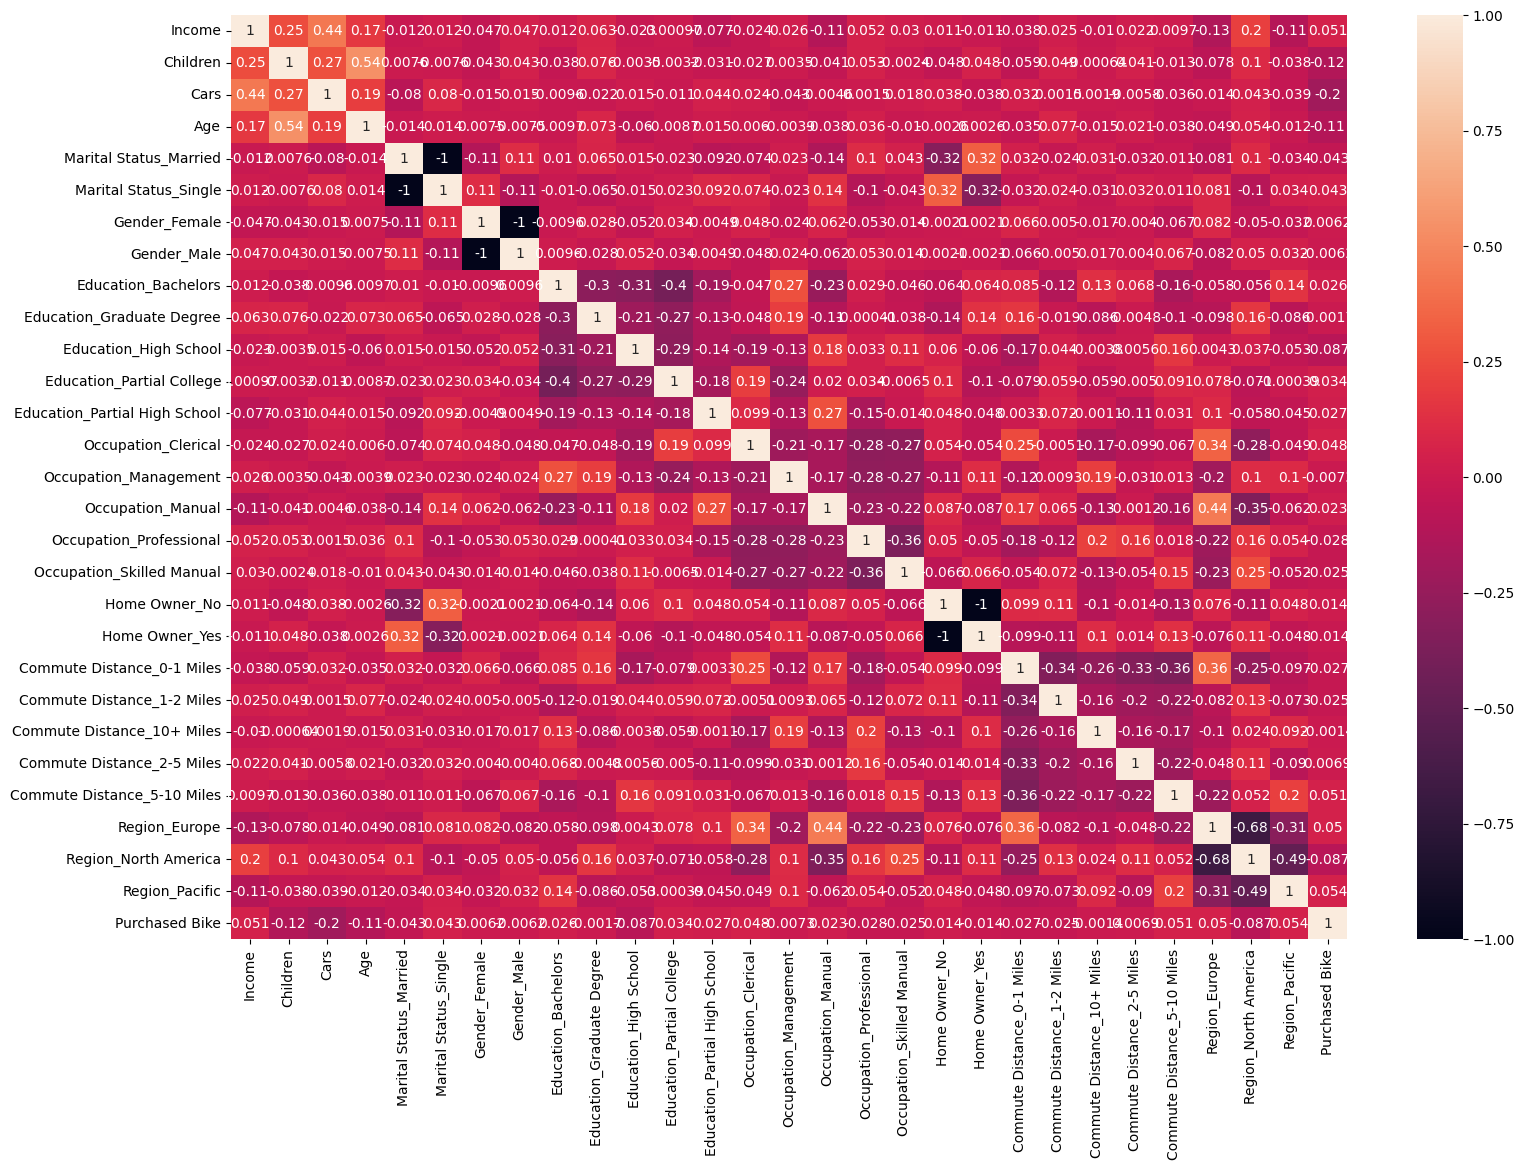

In [ ]:
final_df.corr()
plt.figure(figsize=(18,12))
sb.heatmap(final_df.corr(), annot=True)

# Modelling 1

In [ ]:
X = final_df.drop(columns=['Purchased Bike'])
y = final_df['Purchased Bike']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

Income  Children  Cars   Age  Marital Status_Married  \
0    40000.0       1.0   0.0  42.0                     1.0   
1    30000.0       3.0   1.0  43.0                     1.0   
2    80000.0       5.0   2.0  60.0                     1.0   
4    30000.0       0.0   0.0  36.0                     1.0   
5    10000.0       2.0   0.0  50.0                     1.0   
..       ...       ...   ...   ...                     ...   
946  90000.0       5.0   2.0  63.0                     0.0   
947  90000.0       4.0   3.0  45.0                     1.0   
948  60000.0       0.0   0.0  40.0                     1.0   
949  70000.0       2.0   2.0  53.0                     0.0   
950  70000.0       1.0   0.0  34.0                     0.0   

     Marital Status_Single  Gender_Female  Gender_Male  Education_Bachelors  \
0                      0.0            1.0          0.0                  1.0   
1                      0.0            0.0          1.0                  0.0   
2                      0.0            0.0          1.0                  0.0   
4                      0.0            1.0          0.0                  0.0   
5                      0.0            0.0          1.0                  1.0   
..                     ...            ...          ...                  ...   
946                    1.0            0.0          1.0                  0.0   
947                    0.0            0.0          1.0                  0.0   
948                    0.0            0.0          1.0                  0.0   
949                    1.0            0.0          1.0                  0.0   
950                    1.0            0.0          1.0                  1.0   

     Education_Graduate Degree  ...  Home Owner_No  Home Owner_Yes  \
0                          0.0  ...            0.0             1.0   
1                          0.0  ...            0.0             1.0   
2                          0.0  ...            1.0             0.0   
4                          0.0  ...            0.0             1.0   
5                          0.0  ...            0.0             1.0   
..                         ...  ...            ...             ...   
946                        0.0  ...            1.0             0.0   
947                        0.0  ...            0.0             1.0   
948                        0.0  ...            0.0             1.0   
949                        1.0  ...            0.0             1.0   
950                        0.0  ...            1.0             0.0   

     Commute Distance_0-1 Miles  Commute Distance_1-2 Miles  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         0.0   
4                           0.0                         1.0   
5                           1.0                         0.0   
..                          ...                         ...   
946                         1.0                         0.0   
947                         0.0                         1.0   
948                         0.0                         0.0   
949                         0.0                         0.0   
950                         0.0                         1.0   

     Commute Distance_10+ Miles  Commute Distance_2-5 Miles  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         1.0   
4                           0.0                         0.0   
5                           0.0                         0.0   
..                          ...                         ...   
946                         0.0                         0.0   
947                         0.0                         0.0   
948                         0.0                         1.0   
949                         0.0                         1.0   
950                  

In [ ]:
y

0      0.0
1      0.0
2      0.0
4      1.0
5      0.0
      ... 
946    1.0
947    1.0
948    0.0
949    0.0
950    0.0
Name: Purchased Bike, Length: 908, dtype: float64

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.54
Accuracy (Train Set): 0.62
Precision (Test Set): 0.57
Recall (Test Set): 0.47
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.58
roc_auc (train-proba): 0.67
recall (crossval train): 0.35399755799755805
recall (crossval test): 0.38113897596656215


In [ ]:
cv_scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_logreg)
print("Mean CV Score:", cv_scores_logreg.mean())

Cross-Validation Scores: [0.55479452 0.5862069  0.56551724 0.55862069 0.51724138]
Mean CV Score: 0.5564761454888993


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.63
Accuracy (Train Set): 0.76
Precision (Test Set): 0.66
Recall (Test Set): 0.59
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.83
recall (crossval train): 0.7591566951566951
recall (crossval test): 0.6001044932079416


In [ ]:
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Score:", cv_scores_knn.mean())

Cross-Validation Scores: [0.64383562 0.6137931  0.65517241 0.56551724 0.5862069 ]
Mean CV Score: 0.612905054322154


## Extra Tree Classifier

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
eval_classification(etc)

Accuracy (Test Set): 0.54
Accuracy (Train Set): 1.00
Precision (Test Set): 0.58
Recall (Test Set): 0.47
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.60
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.5290752351097179


In [ ]:
cv_scores_etc = cross_val_score(etc, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_etc)
print("Mean CV Score:", cv_scores_etc.mean())

Cross-Validation Scores: [0.60273973 0.57931034 0.5862069  0.55172414 0.60689655]
Mean CV Score: 0.5853755314123761


## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
eval_classification(nb)

Accuracy (Test Set): 0.54
Accuracy (Train Set): 0.61
Precision (Test Set): 0.56
Recall (Test Set): 0.56
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.67
recall (crossval train): 0.6563760683760684
recall (crossval test): 0.6366771159874609


In [ ]:
cv_scores_nb = cross_val_score(nb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_nb)
print("Mean CV Score:", cv_scores_nb.mean())

Cross-Validation Scores: [0.59589041 0.59310345 0.6        0.53793103 0.63448276]
Mean CV Score: 0.5922815304676429


## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.58
Accuracy (Train Set): 1.00
Precision (Test Set): 0.62
Recall (Test Set): 0.51
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.62
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.5635579937304075


In [ ]:
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())

Cross-Validation Scores: [0.66438356 0.66206897 0.66206897 0.53793103 0.60689655]
Mean CV Score: 0.626669815777043


## XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy (Test Set): 0.63
Accuracy (Train Set): 1.00
Precision (Test Set): 0.68
Recall (Test Set): 0.53
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.68
roc_auc (train-proba): 1.00
recall (crossval train): 0.9988571428571429
recall (crossval test): 0.5684169278996866


In [ ]:
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_xgb)
print("Mean CV Score:", cv_scores_xgb.mean())

Cross-Validation Scores: [0.65753425 0.62758621 0.67586207 0.59310345 0.56551724]
Mean CV Score: 0.6239206424185169


In [ ]:
mean_cv_scores = [
    cv_scores_logreg.mean(),
    cv_scores_knn.mean(),
    cv_scores_etc.mean(),
    cv_scores_nb.mean(),
    cv_scores_rf.mean(),
    cv_scores_xgb.mean()
]

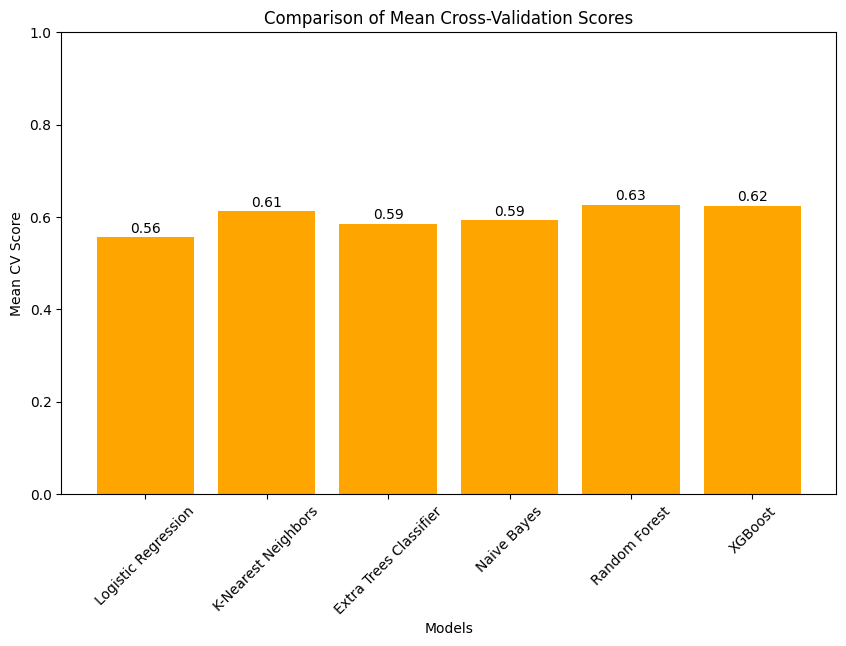

In [ ]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Extra Trees Classifier', 'Naive Bayes','Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.bar(models, mean_cv_scores, color=['orange'])
plt.xlabel('Models')
plt.ylabel('Mean CV Score')
plt.title('Comparison of Mean Cross-Validation Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, score in enumerate(mean_cv_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

Rekomendasi meningkatkan recall:
1. Melakukan feature engineering
2. Seimbangkan data
3. Memilih feature yang relevan
4. Melakukan hyperparameter tunning. Cek overfitting
5. Handling outlier
6. Preprocessing data lebih dalam (cek distribusi data)

Pengembangan berikutnya juga akan berfokus pada algoritma KNN, Naive Bayes, Random Forest dan XGBoost. Karena melihat performa dan kestabilan modelnya dengan menggunakan data yang sama dari percobaan semua algoritma yang digunakan.

# Modelling 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


## Treatment Missing Value (dt)

In [ ]:
miss = df[df['Marital Status'].isna()]
miss

ID Marital Status  Gender    Income  Children            Education  \
8    22155            NaN    Male   20000.0       2.0  Partial High School   
27   18283            NaN  Female  100000.0       0.0            Bachelors   
49   14939            NaN    Male   40000.0       0.0            Bachelors   
98   19441            NaN    Male   40000.0       0.0      Graduate Degree   
150  26154            NaN    Male   60000.0       1.0      Partial College   
234  24611            NaN    Male   90000.0       0.0            Bachelors   
301  17926            NaN  Female       NaN       0.0            Bachelors   

         Occupation Home Owner  Cars Commute Distance   Region   Age  \
8          Clerical        Yes   2.0       5-10 Miles  Pacific  58.0   
27     Professional         No   1.0       5-10 Miles  Pacific  40.0   
49         Clerical        Yes   0.0        0-1 Miles   Europe  39.0   
98         Clerical        Yes   0.0        0-1 Miles   Europe   NaN   
150  Skilled Manual        Yes   1.0       5-10 Miles  Pacific  43.0   
234    Professional         No   4.0        10+ Miles  Pacific  35.0   
301        Clerical         No   0.0        0-1 Miles  Pacific  28.0   

    Purchased Bike  
8               No  
27              No  
49             Yes  
98             Yes  
150            Yes  
234            Yes  
301            Yes

Jika dilihat Marital Status yang NaN, orang-orangnya sudah cenderung tua (usia usia orang yang sudah menikah. Maka akan diisi NaN di Marital Status dengan isian Married

In [ ]:
df['Marital Status'] = df['Marital Status'].fillna('Married')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [ ]:
miss = df[df['Gender'].isna()]
miss

ID Marital Status Gender   Income  Children        Education  \
3    24381         Single    NaN  70000.0       0.0        Bachelors   
154  23426         Single    NaN  80000.0       5.0  Graduate Degree   
335  24369        Married    NaN  80000.0       5.0  Graduate Degree   
601  29231         Single    NaN  80000.0       4.0  Partial College   
688  11699         Single    NaN  60000.0       NaN        Bachelors   
695  18390        Married    NaN  80000.0       5.0  Partial College   
867  26693        Married    NaN  70000.0       3.0  Partial College   
908  23195         Single    NaN  50000.0       3.0        Bachelors   
951  22296        Married    NaN  70000.0       0.0        Bachelors   
973  11734        Married    NaN  60000.0       1.0  Partial College   
997  11809        Married    NaN  60000.0       2.0        Bachelors   

         Occupation Home Owner  Cars Commute Distance         Region   Age  \
3      Professional        Yes   1.0       5-10 Miles        Pacific  41.0   
154      Management        Yes   3.0        0-1 Miles        Pacific  40.0   
335      Management         No   2.0        0-1 Miles        Pacific  39.0   
601    Professional         No   2.0        0-1 Miles  North America  43.0   
688  Skilled Manual         No   2.0        0-1 Miles  North America   NaN   
695    Professional        Yes   2.0        0-1 Miles  North America  44.0   
867    Professional        Yes   1.0       5-10 Miles  North America  49.0   
908  Skilled Manual        Yes   2.0        2-5 Miles  North America  41.0   
951    Professional         No   1.0        0-1 Miles  North America  38.0   
973  Skilled Manual         No   1.0        0-1 Miles  North America  47.0   
997  Skilled Manual        Yes   0.0        0-1 Miles  North America  38.0   

    Purchased Bike  
3              Yes  
154             No  
335             No  
601             No  
688             No  
695             No  
867             No  
908            Yes  
951             No  
973             No  
997            Yes

In [ ]:
df['Gender'].mode()

Kebanyakan Laki laki, yang ada di data, maka akan diisi Male pada missing value di Gender

In [ ]:
df['Gender'] = df['Gender'].fillna('Male')
df.info()

In [ ]:
miss = df[df['Income'].isna()]
miss

Income yang kosong akan diisi dengan rerata income orang dengan jenis occupation yang sama

In [ ]:
df['Income'] = df['Income'].fillna(df.groupby('Occupation')['Income'].transform('mean'))
df.info()

In [ ]:
miss = df[df['Children'].isna()]
miss

Akan diisi missing value di kolom children dengan, apabila maritas statusnya 0, maka children diisi dengan 0, apabila married maka diisi modus dari children.

In [ ]:
df['Children'] = df['Children'].fillna(0)
df.info()

In [ ]:
miss = df[df['Home Owner'].isna()]
miss

Akan diisi modus di Home Owner, tapi besardasarkan modus di tiap jenis occupationnya

In [ ]:
df['Home Owner'] = df['Home Owner'].fillna(df.groupby('Occupation')['Home Owner'].transform(lambda x: x.mode()[0]))
df.info()

In [ ]:
miss = df[df['Cars'].isna()]
miss

Akan diisi dengan modus sesuai occupation dan home ownernya

In [ ]:
df['Cars'] = df['Cars'].fillna(df.groupby(['Occupation', 'Home Owner'])['Cars'].transform(lambda x: x.mode()[0]))
df.info()

In [ ]:
miss = df[df['Age'].isna()]
miss

akan diisi dengan mean dari tiap marital statusnya

In [ ]:
df['Age'] = df['Age'].fillna(df.groupby('Marital Status')['Age'].transform('mean'))
df.info()

In [ ]:
data = df.copy()
data.info()

In [ ]:
categorical_features = data[['Gender', 'Region']]
other_features = ['Income', 'Children', 'Cars', 'Age']

onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features.columns))

label_encoder = LabelEncoder()

data['Purchased Bike'] = label_encoder.fit_transform(data['Purchased Bike'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Commute Distance'] = label_encoder.fit_transform(data['Commute Distance'])
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Home Owner'] = label_encoder.fit_transform(data['Home Owner'])

dt_cleaned = pd.concat([data[other_features], encoded_df, data[['Purchased Bike', 'Education', 'Occupation', 'Commute Distance', 'Marital Status', 'Home Owner']]], axis=1)
dt_cleaned.info()

In [ ]:
X = dt_cleaned.drop(columns=['Purchased Bike'])
y = dt_cleaned['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
eval_classification(xgb)
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", xgb_cv_scores)
print("Mean CV Score:", xgb_cv_scores.mean())

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Scores:", knn_cv_scores)
print("Mean CV Score:", knn_cv_scores.mean())

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Score:", rf_cv_scores.mean())

## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
eval_classification(nb)
nb_cv_scores = cross_val_score(nb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", nb_cv_scores)
print("Mean CV Score:", nb_cv_scores.mean())

In [ ]:
knn_recall_cv_scores_test = cross_validate(knn, X_train, y_train, cv=5, scoring='recall', return_train_score=False)['test_score']
nb_recall_cv_scores_test = cross_validate(nb, X_train, y_train, cv=5, scoring='recall', return_train_score=False)['test_score']
rf_recall_cv_scores_test = cross_validate(rf, X_train, y_train, cv=5, scoring='recall', return_train_score=False)['test_score']
xgb_recall_cv_scores_test = cross_validate(xgb, X_train, y_train, cv=5, scoring='recall', return_train_score=False)['test_score']

recall_cv_scores_test = [
    knn_recall_cv_scores_test.mean(),
    nb_recall_cv_scores_test.mean(),
    rf_recall_cv_scores_test.mean(),
    xgb_recall_cv_scores_test.mean()
]

models = ['K-Nearest Neighbors', 'Naive Bayes', 'Random Forest', 'XGBoost']
plt.figure(figsize=(10, 6))
plt.bar(models, recall_cv_scores_test, color=['orange'])
plt.xlabel('Models')
plt.ylabel('Recall (Cross-Validation Test)')
plt.title('Comparison of Recall (Cross-Validation Test) Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, score in enumerate(recall_cv_scores_test):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

In [ ]:
mean_cv_scores = [
    knn_cv_scores.mean(),
    nb_cv_scores.mean(),
    rf_cv_scores.mean(),
    xgb_cv_scores.mean()
]

models = ['K-Nearest Neighbors', 'Naive Bayes','Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.bar(models, mean_cv_scores, color=['orange'])
plt.xlabel('Models')
plt.ylabel('Mean CV Score')
plt.title('Comparison of Mean Cross-Validation Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, score in enumerate(mean_cv_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

Data bisa dikatakan cukup seimbang

In [ ]:
import matplotlib.pyplot as plt

for i in dt_cleaned.columns:
    sb.histplot(data=dt_cleaned, x=i, hue='Purchased Bike', multiple='stack', kde=True)
    plt.show()

In [ ]:
numeric = ['Income', 'Children', 'Cars', 'Age']

In [ ]:
for i in df[numeric].columns:
    sb.boxplot(data=df[numeric], x=i)
    plt.show()

Menggunakan Standarisasi data malah performanya menurun

In [ ]:
data.info()

In [ ]:
dt_cleaned.sample(5)

In [ ]:
dt_cleaned.info()

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=i, random_state=42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('n_estimators: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 10)]
draw_learning_curve(param_values)

# Hyperparameter tunning menggunakan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid yang ingin dicoba
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit GridSearchCV dengan data training
grid_search.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#Evaluasi model dengan data testing menggunakan model terbaik
best_rf = grid_search.best_estimator_
y_pred_proba = best_rf.predict_proba(X_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
print("Test AUC:", test_auc)

In [ ]:
best_rf.fit(X_train, y_train)
eval_classification(best_rf)

Overfittingnya berkurang, namun recallnya juga malah ikut berkurang.

In [ ]:
# Melakukan Cross-Validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
# Menampilkan hasil
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

In [ ]:
from sklearn.metrics import make_scorer, recall_score

# Definisikan parameter grid yang ingin dicoba
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Inisialisasi model XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Gunakan recall sebagai metrik evaluasi
recall_scorer = make_scorer(recall_score)

# Inisialisasi GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring=recall_scorer, verbose=2)

# Fit GridSearchCV dengan data training
grid_search.fit(X_train, y_train)

# Cetak hasil hyperparameter tuning
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Gunakan model dengan parameter terbaik
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Evaluasi model dengan data testing
eval_classification(best_xgb)

# Melakukan Cross-Validation
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring=recall_scorer)
# Menampilkan hasil
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

1.	n_estimators: Jumlah pohon yang akan digunakan dalam model. Lebih banyak pohon bisa meningkatkan performa tetapi juga meningkatkan risiko overfitting.
2.	max_depth: Kedalaman maksimum dari pohon. Kedalaman yang lebih besar memungkinkan model untuk belajar pola yang lebih kompleks tetapi juga dapat menyebabkan overfitting.
3.	learning_rate: Kecepatan pembelajaran. Nilai yang lebih kecil membuat model belajar lebih lambat, yang bisa membantu mencegah overfitting.
4.	subsample: Proporsi sampel data yang akan digunakan untuk membangun setiap pohon. Ini membantu dalam mengurangi overfitting.
5.	colsample_bytree: Proporsi fitur yang akan digunakan untuk membangun setiap pohon. Sama seperti subsample, ini membantu dalam mengurangi overfitting.
6.	gamma: Minimum loss reduction yang dibutuhkan untuk membuat split baru di pohon. Nilai yang lebih tinggi membuat model lebih konservatif.
7.	min_child_weight: Minimum sum of instance weight (hessian) needed in a child. Nilai yang lebih tinggi membuat model lebih konservatif.

# Feature Importance

In [ ]:
# Gunakan best estimator
best_rf = grid_search.best_estimator_

# Daftar nama fitur
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

# Tampilkan feature importances
show_feature_importance(best_rf)

# Reencode Data 2

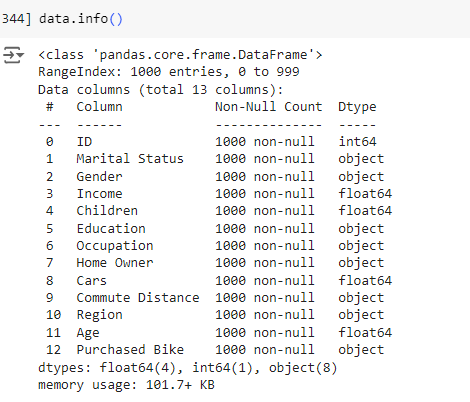

In [ ]:
best_rf.fit(X_train, y_train)
eval_classification(best_rf)